In [1]:
import pandas as pd
import numpy as np
import time
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import inv                    # for matrix inverse
from scipy.stats import multivariate_normal
from sklearn import mixture
from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, adjusted_rand_score, mutual_info_score, homogeneity_score, davies_bouldin_score, v_measure_score, completeness_score

def purity_score(y_true, y_pred):
    contingency_matrix=metrics.cluster.contingency_matrix(y_true,y_pred)
    return np.sum(np.amax(contingency_matrix,axis=0))/np.sum(contingency_matrix)

In [75]:
data_set=1

if data_set==1:
   #simulated
    size=200
    dimension=100
    clusters=5
    data_set=[]
    for i in range(size):
        for k in range(clusters):
            mn=(2+k)*np.ones(dimension)
            arr=.01*np.ones(dimension)
            cov=np.diag(arr)
            x=np.random.multivariate_normal(mn, cov, 1)
            temp=x[0].tolist()
            temp.append(k)
            data_set.append(temp)

    df=pd.DataFrame(data=data_set)  
    y=df[dimension]
    X=df.drop(dimension,axis=1)

elif data_set==2:
     #titanic
    df=pd.read_csv("dataSets/titanic.csv")
    del df["PassengerId"]
    del df["Name"]
    del df["Ticket"]
    del df["Cabin"]
    df['Sex']=df['Sex'].replace(to_replace='male',value='1')
    df['Sex']=df['Sex'].replace(to_replace='female',value='0')
    df['Embarked']=df['Embarked'].replace(to_replace='S',value='0')
    df['Embarked']=df['Embarked'].replace(to_replace='C',value='1')
    df['Embarked']=df['Embarked'].replace(to_replace='Q',value='2')
    #now with extraneous columns deleted and categorical data data converted to integers, I'll delete all rows with corrupting NaN values
    df=df.dropna()
    df.head()
    y=df['Survived']
    X=df.drop('Survived',axis=1)
elif data_set==3:
    #diabetes
    df=pd.read_csv("dataSets/diabetes.csv")
    zero_to_nan=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    for col in zero_to_nan:
            df[col]=df[col].replace(0,np.NaN)
            mean=int(df[col].mean(skipna=True))
            df[col]=df[col].replace(np.NaN,mean)
            X=df.drop('Outcome',axis=1)
            y=df['Outcome']

            
sc=StandardScaler()
sc.fit(X)
scaled_data=sc.transform(X)
            
#mms = MinMaxScaler()
#mms.fit(X)
#scaled_data = mms.transform(X)
#scaled_data=X

In [76]:
ari=[]
aic =[]
bic=[]
log_l=[]
sil_score=[]
mi=[]
homo=[]
comp=[]
v=[]
davies=[]
clusters=range(3,20)

for c in clusters:
    em=mixture.GaussianMixture(n_components=c, covariance_type='full',max_iter=1000,init_params='kmeans')
    em.fit(scaled_data)
    pred=em.predict(scaled_data)    
    sil_score.append(metrics.silhouette_score(scaled_data,pred,metric="euclidean",sample_size=100))
    log_l.append(em.score(scaled_data))
    aic.append(em.aic(scaled_data))
    bic.append(em.bic(scaled_data))
    ari.append(adjusted_rand_score(y, pred))
    mi.append(mutual_info_score(y,pred))
    homo.append(homogeneity_score(y,pred))
    comp.append(completeness_score(y,pred))
    v.append(v_measure_score(y,pred))           
    davies.append(davies_bouldin_score(scaled_data, pred))

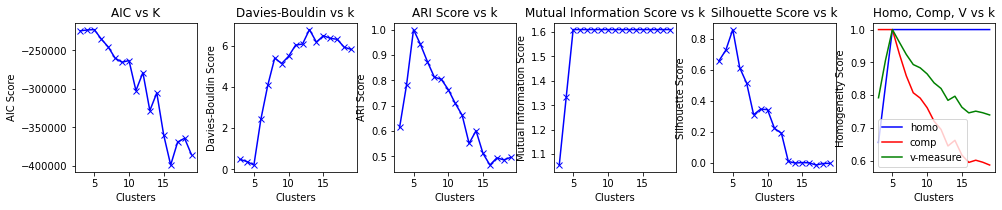

In [78]:
plt.subplots(figsize=(14, 3))

plt.subplot(1, 6, 1) # index 2
plt.plot(clusters, aic, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('AIC Score')
plt.title('AIC vs K')
plt.tight_layout(pad=1.0)


plt.subplot(1, 6, 2) # index 2
plt.plot(clusters, davies, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin vs k')
plt.tight_layout(pad=1.0)


plt.subplot(1, 6, 3) # row 1, col 2 index 1
plt.plot(clusters, ari, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('ARI Score')
plt.title('ARI Score vs k')

 
plt.subplot(1, 6, 4) # index 2
plt.plot(clusters, mi, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score vs k')

plt.subplot(1, 6, 5) # index 2
plt.plot(clusters, sil_score, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')  

plt.subplot(1, 6, 6) # index 2
plt.plot(clusters, homo,color='blue')
plt.plot(clusters, comp, 'red')
plt.plot(clusters,v, color='green')
plt.xlabel('Clusters')
plt.ylabel('Homogeneity Score')
plt.title('Homo, Comp, V vs k')
plt.legend(["homo" , "comp","v-measure"])


plt.show() 


In [7]:
lab=list()
pure=list()
#em_gaussian=mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=100,init_params='random')
em=mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=100,init_params='kmeans')
em.fit(X)
clusters=em.predict(X)
lab.append('Random 10 tied')
pure.append(purity_score(y,clusters))

In [40]:
pure

[0.9666666666666667]

In [21]:
df=pd.read_csv("dataSets/titanic.csv")
del df["PassengerId"]
del df["Name"]
del df["Ticket"]
del df["Cabin"]
df['Sex']=df['Sex'].replace(to_replace='male',value='1')
df['Sex']=df['Sex'].replace(to_replace='female',value='0')
df['Embarked']=df['Embarked'].replace(to_replace='S',value='0')
df['Embarked']=df['Embarked'].replace(to_replace='C',value='1')
df['Embarked']=df['Embarked'].replace(to_replace='Q',value='2')
#now with extraneous columns deleted and categorical data data converted to integers, I'll delete all rows with corrupting NaN values
df=df.dropna()
df.head()
y=df['Survived']
X=df.drop('Survived',axis=1)

In [31]:
log_liklihood=[]
sil_score=[]
components=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for c in components:
    em_gaussian=mixture.GaussianMixture(n_components=c, covariance_type='full',max_iter=1000,init_params='kmeans')
    em_gaussian.fit(X)
    log_liklihood.append(em_gaussian.lower_bound_)
    if c>1:
        y_pred=em_gaussian.predict(X)
        sil_score.append(metrics.silhouette_score(df,y_pred,metric="euclidean",sample_size=100))


In [24]:
lab=list()
pure=list()
#em_gaussian=mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=100,init_params='random')
em_gaussian=mixture.GaussianMixture(n_components=2, covariance_type='full',max_iter=1000,init_params='kmeans')
em_gaussian.fit(X)
clusters=em_gaussian.predict(X)
purity_score(y,clusters)

0.6741573033707865

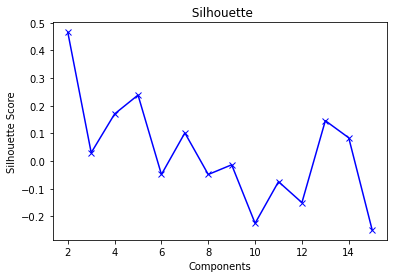

In [32]:
plt.plot(components, sil_score, 'bx-')
plt.xlabel('Components')
plt.ylabel('Silhouette Score')
plt.title(' Silhouette')
plt.show()  

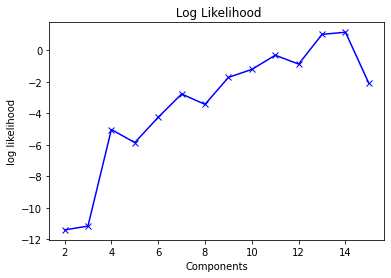

In [30]:
plt.plot(components, log_liklihood, 'bx-')
plt.xlabel('Components')
plt.ylabel('log likelihood')
plt.title(' Log Likelihood')
plt.show()    

In [16]:
#diabetes

In [35]:
df=pd.read_csv("dataSets/diabetes.csv")
zero_to_nan=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in zero_to_nan:
             df[col]=df[col].replace(0,np.NaN)
             mean=int(df[col].mean(skipna=True))
             df[col]=df[col].replace(np.NaN,mean)
df
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [37]:
mms = MinMaxScaler()
mms.fit(df)
scaled_data = mms.transform(df)

In [38]:
log_liklihood=[]
sil_score=[]
components=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for c in components:
    em_gaussian=mixture.GaussianMixture(n_components=c, covariance_type='full',max_iter=1000,init_params='kmeans')
    em_gaussian.fit(X)
    log_liklihood.append(em_gaussian.lower_bound_)
    if c>1:
        y_pred=em_gaussian.predict(X)
        sil_score.append(metrics.silhouette_score(df,y_pred,metric="euclidean",sample_size=100))


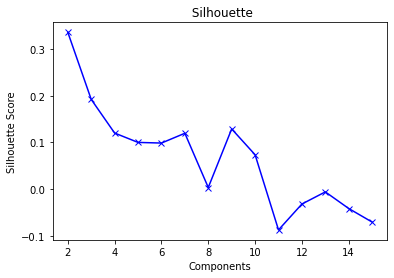

In [40]:
plt.plot(components, sil_score, 'bx-')
plt.xlabel('Components')
plt.ylabel('Silhouette Score')
plt.title(' Silhouette')
plt.show()  

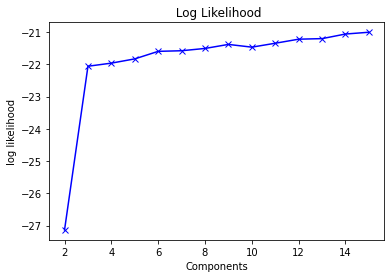

In [41]:
plt.plot(components, log_liklihood, 'bx-')
plt.xlabel('Components')
plt.ylabel('log likelihood')
plt.title(' Log Likelihood')
plt.show()    

In [19]:
lab=list()
pure=list()
#em_gaussian=mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=100,init_params='random')
em_gaussian=mixture.GaussianMixture(n_components=2, covariance_type='full',max_iter=100,init_params='kmeans')
em_gaussian.fit(X)
clusters=em_gaussian.predict(X)
purity_score(y,clusters)

0.6575520833333334